# Monte Carlo Simulations - Lab

## Introduction

Often when attempting to conduct a permutation test, the total number of possible combinations is exceedingly large. At times, this number can be so vast that even with modern computers, it is infeasible or exceedingly resource heavy in order to compute all possible variations. As a result, these large sets can be approximated using monte carlo simulations. In this lab, you will combine ideas from the previous lessons and labs in order to conduct a monte carlo simulation of a permutation test that would otherwise be infeasible to compute.


## Objectives 

You will be able to:
* Understand permutation testing
* Understand and conduct Monte Carlo simulations

## Exploding Sample Sizes

As we discussed in the previous lecture, permutation test sizes can quickly explode as our original sample sizes grow. To demonstrate this, Create a graph to show how the number of combinations increases as we increase just one of the sample sizes. Assume that our first sample is of 25 individuals. From there, plot a graph of how the permutation test sample size increases drastically as our second sample increases from 10 to 200 individuals. (Assume that every new person has a unique blood pressure; a stretch of an assumption, but greatly simplifies our calculations for now.)

In [4]:
import itertools
from scipy.special import comb
import matplotlib.pyplot as plt

In [6]:
# Your code here
sample_a = list(range(25))
sample_b = list(range(25,35))
sample_size = len(sample_a)
n_items = len(sample_a) + len(sample_b)
print("one sample of 25, one of 10. number of combinations: ",  str(comb(n_items, sample_size)))

one sample of 25, one of 10. number of combinations:  183579396.0


In [14]:
n_combs_list = []
n_combs_list.append(183579396.0)
for i in range(1,191):
    sample_b = list(range(25,35+i))
    sample_size =len(sample_a)
    n_items = len(sample_a) + len(sample_b)
    n_combs = comb(n_items, sample_size)
    n_combs_list.append(n_combs)

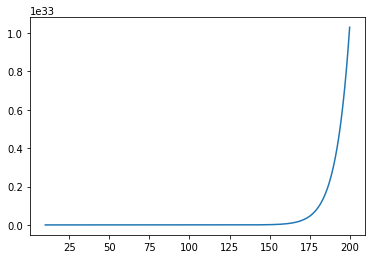

In [17]:
x = list(range(10,201))
fig = plt.figure()
plt.plot(x, n_combs_list)

## Creating the Monte Carlo Simulation

Let's expand upon our blood pressure example from the preceding lab. Even with our previous sample sizes of a sample of 14 and a sample of 12, we had a total of over 9 million combinations. As you can see from the graph above, this quantity continues to rapidly increase. As a result, it is often impracticle or impossible to calculate all possible combinations. Instead, use a Monte Carlo Simulation to sample from the combination space in order to emulate a permutation test. While a precise simulation of a permutation test would record which combinations we have already simulated, doing so greatly reduces the speed of the process. Below is the complete samples of two populations blood pressure.  
  
Write a Monte Carlo simulation to sample from the permutation space. Be sure to not allow replacement so that certain possible combinations are not repeated. Calculate the p-value after `10, 100, 500, 1000, 10**4, 10**5, 10**6, 2*10**6 and 5*10**6` iterations. Graph these to show how the p-value stabilizes and converges after a large number of iterations.
 

In [18]:
a = [109.6927759 , 120.27296943, 103.54012038, 114.16555857,
       122.93336175, 110.9271756 , 114.77443758, 116.34159338,
       130.72888419, 116.04552895, 114.8313492 , 117.52704641,
       109.06597142, 117.0317262 , 114.34876391, 111.32151926,
       108.90594481, 110.95040527,  99.15890727, 117.93581615,
       106.35644209, 112.88102458, 103.87574946, 111.88394265,
       115.42450119, 124.02872282, 116.19121625, 115.59471365,
       112.66413025, 118.30562665, 132.31196515, 117.99000948]
b = [123.98967482, 141.11969004, 117.00293412, 121.6419775 ,
       123.2703033 , 123.76944385, 105.95249634, 114.87114479,
       110.50162354, 121.31836918, 124.9483451 , 126.04639783,
       119.71433463, 117.49416398, 129.47657837, 115.57798929,
       117.36035264, 130.92919224, 104.43218778, 119.97610071,
       115.67085089, 113.77487389, 114.02470379, 116.64660978,
       117.3023355 , 116.30944159, 123.66560428, 117.87222118,
       128.8445079 , 111.7976685 , 117.25730744, 111.62121119,
       110.12277446, 112.7150916 , 129.21006268, 125.97287311,
       130.6878082 , 140.60768727, 121.95433026, 123.11996767,
       129.93260914, 121.01049611, 129.23680238]

In [19]:
def permT(a,b):
    union = a + b
    new_as = list(itertools.combinations(union, len(a)))
    new_bs = []
    for new_a in new_as:
        u_copy = union.copy()
        for a in new_a:
            u_copy.remove(a)
        new_bs.append(u_copy)
    return list(zip(new_as, new_bs))

In [ ]:
#Your code here
import numpy as np
mean_diff = np.mean(a) - np.mean(b)
iter_list = [10, 100, 500, 1000, 10**4, 10**5, 10**6, 2*10**6, 5*10**6]
p_vals = []
for iter_num in iter_list:
    greater = 0
    for i in range(iter_num):
        combos = permT(a, b)
        for ai, bi in combos:
            diff_mu_ai_bi = np.mean(ai) - np.mean(bi)
            if diff_mu_ai_bi >= mean_diff:
                greater +=1
    p_val = num / len(combos)
    p_val.append([iter_num, p_vals])

## Summary

In this lab you simulated a permutation test and observed both how combination sizes explode rapidly and how p-values will converge over time in a simulation.